In [19]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df_react = pd.read_csv('../../../Datasets/RQ1/react_metrics.csv', index_col=0 )
df_react.head()

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.3.0,2013-05-29,1369856771,0.5,10,4.0,1.0,37898,20042,246223
1,v0.3.3,2013-06-20,1371766458,3.6,0,1.0,1.0,4830,7246,22301
2,v0.4.0,2013-07-17,1374086011,3.4,0,1.0,1.0,5436,7593,25895
3,v0.4.1,2013-07-26,1374878032,3.4,0,1.0,1.0,5427,7576,25921
4,v0.4.2,2013-12-17,1387346417,3.4,0,1.0,1.0,5432,7576,25981


# Column Metadata

In [ ]:
df_react.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               45 non-null     object 
 1   release_date          45 non-null     object 
 2   timestamp             45 non-null     int64  
 3   sqale_debt_ratio      45 non-null     float64
 4   vulnerabilities       45 non-null     int64  
 5   security_rating       45 non-null     float64
 6   sqale_rating          45 non-null     float64
 7   complexity            45 non-null     int64  
 8   cognitive_complexity  45 non-null     int64  
 9   ncloc                 45 non-null     int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.9+ KB


# Statistical Information


In [ ]:
df_react.describe()

,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,4.500000e+01,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000
mean,1.497652e+09,1.602222,4.177778,2.800000,1.0,15241.577778,9182.688889,95984.666667
std,8.547130e+07,1.224650,5.335511,1.486301,0.0,12942.267480,10841.932218,79402.770251
min,1.369857e+09,0.200000,0.000000,1.000000,1.0,339.000000,196.000000,3551.000000
25%,1.425412e+09,0.300000,0.000000,1.000000,1.0,5436.000000,4591.000000,31450.000000
50%,1.501802e+09,1.400000,1.000000,4.000000,1.0,12535.000000,7100.000000,81822.000000
75%,1.570127e+09,2.300000,10.000000,4.000000,1.0,24326.000000,10147.000000,164813.000000
max,1.654733e+09,3.900000,14.000000,4.000000,1.0,66139.000000,73420.000000,328950.000000


In [ ]:
df_react.columns

Index(['version', 'release_date', 'timestamp', 'sqale_debt_ratio',
       'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

# Null Value Check

In [ ]:
df_react.isnull().sum()

version                 0
release_date            0
timestamp               0
sqale_debt_ratio        0
vulnerabilities         0
security_rating         0
sqale_rating            0
complexity              0
cognitive_complexity    0
ncloc                   0
dtype: int64

# Data Distribution For Numerical Columns (Histogram)

NameError: name 'sns' is not defined

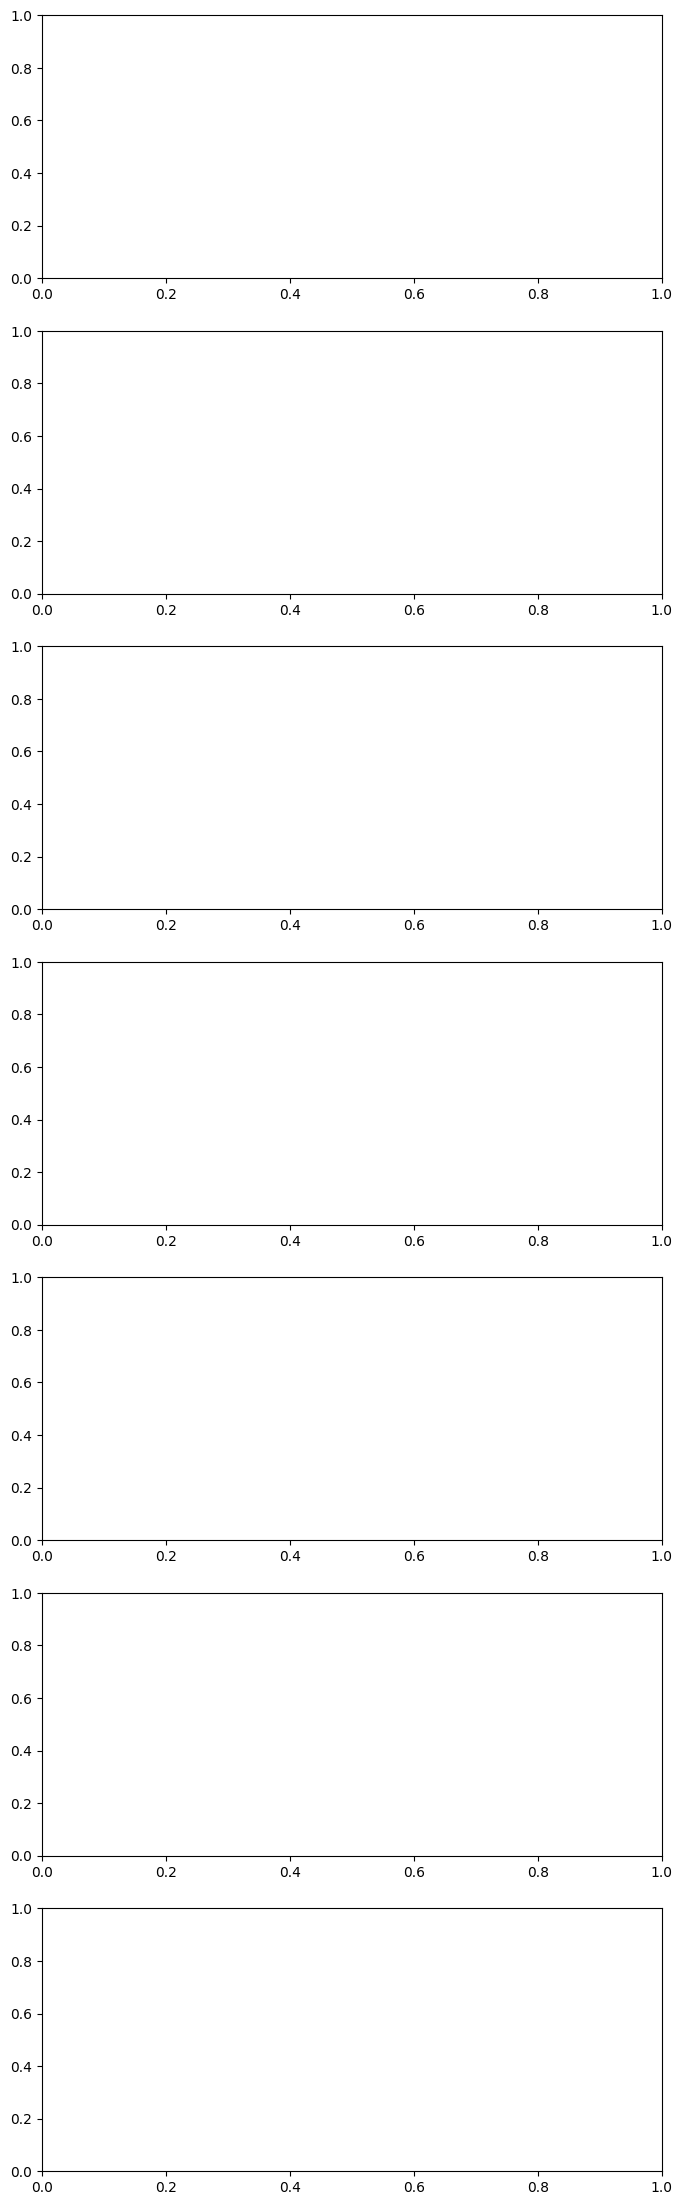

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(df_react.columns)-3, figsize=(8, 4 * (len(df_react.columns)-3)))

# Create histograms for each numerical column excluding the first 3 columns
for i, col in enumerate(df_react.columns[3:]):
    if pd.api.types.is_numeric_dtype(df_react[col]):
        sns.histplot(df_react[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)  # Add x-axis label
        axes[i].set_ylabel('Frequency')  # Add y-axis label

# Adjust layout
plt.tight_layout()
plt.show()

# Control Chart For the Variables against the Release Date

In [ ]:

# Extract numerical columns (excluding 'version', 'release_date', and 'timestamp')
numerical_columns = [col for col in df_react.columns if pd.api.types.is_numeric_dtype(df_react[col]) and col not in ['version', 'release_date', 'timestamp']]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(12, 6 * len(numerical_columns)))

# Create line plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.lineplot(x=pd.to_datetime(df_react['release_date']), y=df_react[col], marker='o', ax=axes[i])
    
    # Calculate upper and lower limits (for illustration purposes, you might want to adjust these based on your process)
    upper_limit = df_react[col].mean() + 3 * df_react[col].std()
    lower_limit = df_react[col].mean()
    
    # Plot upper and lower limit lines
    axes[i].axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
    axes[i].axhline(y=lower_limit, color='g', linestyle='--', label='Lower Limit')

    axes[i].set_title(f'Line Plot for {col}')
    axes[i].set_xlabel('Release Date')
    axes[i].set_ylabel(col)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Scatter Plot Between Numerical Columns

In [ ]:
# Extract numerical columns (excluding 'version', 'release_date', and 'timestamp')
numerical_columns = [col for col in df_react.columns if pd.api.types.is_numeric_dtype(df_react[col]) and col not in ['version', 'release_date', 'timestamp']]

# Create a pair plot for all numerical columns
sns.pairplot(df_react[numerical_columns])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

# Pearson Correlation

In [ ]:
# Remove specified columns
columns_to_remove = ['version', 'release_date', 'timestamp','sqale_rating']
df_react_filtered = df_react.drop(columns=columns_to_remove, axis=1)

# Calculate Pearson correlation for remaining columns
pearson_corr_filtered = df_react_filtered.corr(method='pearson')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Pearson correlation heatmap
sns.heatmap(pearson_corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Pearson Correlation')

# Adjust layout
plt.tight_layout()
plt.show()


# Spearman Correlation

In [ ]:
# Assuming df_react is your DataFrame

# Remove specified columns
columns_to_remove = ['version', 'release_date', 'timestamp','sqale_rating']
df_react_filtered = df_react.drop(columns=columns_to_remove, axis=1)

# Calculate Spearman correlation for remaining columns
spearman_corr_filtered = df_react_filtered.corr(method='spearman')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Spearman correlation heatmap
sns.heatmap(spearman_corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Spearman Correlation')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(8, 4))

# # Create a bar plot for the distribution of the 'sqale_rating' column
# sns.barplot(x=df_react['sqale_rating'].value_counts().index, y=df_react['sqale_rating'].value_counts(), ax=ax)
# ax.set_title('Distribution of sqale_rating')
# ax.set_xlabel('sqale_rating')
# ax.set_ylabel('Count')

# # Adjust layout
# plt.tight_layout()
# plt.show()

# Boxplot For The Numerical Colummns

In [ ]:
# Remove specified columns
columns_to_remove = ['version', 'release_date', 'timestamp']
df_react_filtered = df_react.drop(columns=columns_to_remove, axis=1)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(df_react_filtered.columns), figsize=(8, 4 * len(df_react_filtered.columns)))

# Create boxplots for each numerical column
for i, col in enumerate(df_react_filtered.columns):
    sns.boxplot(x=df_react_filtered[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming df_react is your DataFrame
# Use the select_dtypes method to filter columns by data type
categorical_columns = df_react.select_dtypes(include=['object', 'category']).columns

# Print or inspect the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_react[['ncloc']]
y = df_react['complexity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


import matplotlib.pyplot as plt

# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, predictions, color='red', linewidth=3, label='Regression Line')

plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('ncloc')
plt.ylabel('complexity')
plt.legend()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['complexity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'R-squared': r2}
    
    # Scatter plot of actual data points
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    
    # Regression line
    plt.plot(X_test, predictions, linewidth=3, label=f'{name} Predictions')

    plt.title(f'{name} Model: Actual vs Predicted')
    plt.xlabel('ncloc')
    plt.ylabel('complexity')
    plt.legend()
    plt.show()

# Display results
for name, metrics in results.items():
    print(f"{name} Model:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['sqale_rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'R-squared': r2}
    
    # Scatter plot of actual data points
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    
    # Regression line
    plt.plot(X_test, predictions, linewidth=3, label=f'{name} Predictions')

    plt.title(f'{name} Model: Actual vs Predicted')
    plt.xlabel('ncloc')
    plt.ylabel('complexity')
    plt.legend()
    plt.show()

# Display results
for name, metrics in results.items():
    print(f"{name} Model:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['cognitive_complexity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'R-squared': r2}
    
    # Scatter plot of actual data points
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    
    # Regression line
    plt.plot(X_test, predictions, linewidth=3, label=f'{name} Predictions')

    plt.title(f'{name} Model: Actual vs Predicted')
    plt.xlabel('ncloc')
    plt.ylabel('complexity')
    plt.legend()
    plt.show()

# Display results
for name, metrics in results.items():
    print(f"{name} Model:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['cognitive_complexity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
svm_model = SVR(kernel='linear')
dt_model = DecisionTreeRegressor(random_state=42)

# Ensemble Model - Voting Regressor
ensemble_model = VotingRegressor([('SVM', svm_model), ('Decision Tree', dt_model)])

# Evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, ensemble_predictions, linewidth=3, label='Ensemble Predictions')

plt.title('Ensemble Model: Actual vs Predicted')
plt.xlabel('ncloc')
plt.ylabel('complexity')
plt.legend()
plt.show()

# Display results for the ensemble model
print("Ensemble Model:")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"R-squared: {ensemble_r2}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['sqale_rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
svm_model = SVR(kernel='linear')
dt_model = DecisionTreeRegressor(random_state=42)

# Ensemble Model - Voting Regressor
ensemble_model = VotingRegressor([('SVM', svm_model), ('Decision Tree', dt_model)])

# Evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, ensemble_predictions, linewidth=3, label='Ensemble Predictions')

plt.title('Ensemble Model: Actual vs Predicted')
plt.xlabel('ncloc')
plt.ylabel('complexity')
plt.legend()
plt.show()

# Display results for the ensemble model
print("Ensemble Model:")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"R-squared: {ensemble_r2}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_react is your DataFrame
X = df_react[['ncloc']]
y = df_react['complexity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
svm_model = SVR(kernel='linear')
dt_model = DecisionTreeRegressor(random_state=42)

# Ensemble Model - Voting Regressor
ensemble_model = VotingRegressor([('SVM', svm_model), ('Decision Tree', dt_model)])

# Evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, ensemble_predictions, linewidth=3, label='Ensemble Predictions')

plt.title('Ensemble Model: Actual vs Predicted')
plt.xlabel('ncloc')
plt.ylabel('complexity')
plt.legend()
plt.show()

# Display results for the ensemble model
print("Ensemble Model:")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"R-squared: {ensemble_r2}")
